In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import dependencies
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import MultipleLocator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
!pip install xgboost
from xgboost import XGBClassifier
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import sklearn.metrics as metrics
from scipy import stats


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
data = pd.read_csv("IMDB Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(50000, 2)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [ ]:
# one hot encoding
# label encoder

In [ ]:
# positive -> 1
# negative -> 0
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [ ]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [ ]:
# LSTM -> LONG SHORT TERM MEMORY
# RNN -> TEXTUAL DATA

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state=42)

In [ ]:
train_data.shape

(40000, 2)

In [ ]:
test_data.shape

(10000, 2)

In [ ]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data["review"])

In [ ]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [ ]:
X_train

array([[1935,    1, 1200, ...,  205,  351, 3856],
       [   3, 1651,  595, ...,   89,  103,    9],
       [   0,    0,    0, ...,    2,  710,   62],
       ...,
       [   0,    0,    0, ..., 1641,    2,  603],
       [   0,    0,    0, ...,  245,  103,  125],
       [   0,    0,    0, ...,   70,   73, 2062]], dtype=int32)

In [ ]:
X_test

array([[   0,    0,    0, ...,  995,  719,  155],
       [  12,  162,   59, ...,  380,    7,    7],
       [   0,    0,    0, ...,   50, 1088,   96],
       ...,
       [   0,    0,    0, ...,  125,  200, 3241],
       [   0,    0,    0, ..., 1066,    1, 2305],
       [   0,    0,    0, ...,    1,  332,   27]], dtype=int32)

In [ ]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [ ]:
Y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

In [ ]:
# LSTM MODEL BUILDING

In [ ]:
model = Sequential()
model.add(Embedding(input_dim =5000, output_dim = 128, input_length = 200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = "sigmoid"))

model.summary()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 771713 (2.94 MB)
Trainable params: 771713 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64, validation_split = 0.2)

Epoch 1/5
500/500 [==============================] - 175s 341ms/step - loss: 0.4128 - accuracy: 0.8117 - val_loss: 0.3029 - val_accuracy: 0.8754
Epoch 2/5
500/500 [==============================] - 158s 316ms/step - loss: 0.2797 - accuracy: 0.8880 - val_loss: 0.3351 - val_accuracy: 0.8637
Epoch 3/5
500/500 [==============================] - 156s 312ms/step - loss: 0.2262 - accuracy: 0.9104 - val_loss: 0.2937 - val_accuracy: 0.8819
Epoch 4/5
500/500 [==============================] - 156s 311ms/step - loss: 0.1929 - accuracy: 0.9237 - val_loss: 0.3147 - val_accuracy: 0.8805
Epoch 5/5
500/500 [==============================] - 155s 310ms/step - loss: 0.1730 - accuracy: 0.9345 - val_loss: 0.3537 - val_accuracy: 0.8766


In [ ]:
model.save("model.h5")

In [ ]:
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 18s 57ms/step - loss: 0.3364 - accuracy: 0.8819


In [ ]:
print(loss)

0.336422324180603


In [ ]:
print(accuracy)

0.8819000124931335


In [ ]:
# Building Predictive System

In [ ]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [ ]:
predictive_system("This movie was fantastic and amazing")

1/1 [==============================] - 0s 329ms/step


'positive'

In [ ]:
predictive_system("A trilling adventure with stunning visual")

1/1 [==============================] - 0s 70ms/step


'positive'

In [ ]:
predictive_system("A visual masterpiece")

1/1 [==============================] - 0s 70ms/step


'positive'

In [ ]:
predictive_system("Overall long and slow")

1/1 [==============================] - 0s 74ms/step


'negative'

## Machine Learning Modles

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'review' is the feature column and 'sentiment' is the label column
X = data['review']
y = data['sentiment']

In [ ]:
#Split the data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)

Split the data into Training and Test sets.

In [ ]:
# Create empty lists for model Metrics

precision = []
accuracy = []
recall = []
f1_scores = []
cross_validation_score =[]

In [ ]:
# Create empty data frame for model Metrics
overview = pd.DataFrame()
overview[''] = ['Random Forest1','Random Forest2','Random Forest3', 'Decision Tree1','Decision Tree2','Decision Tree3', 'KNN1','KNN2','KNN3', 'XG Boost1','XG Boost2','XG Boost3']


In [ ]:
# Create second empty data frame for model Metrics
overview2 = pd.DataFrame()
overview2[''] = ['Random Forest1','Random Forest2','Random Forest3', 'Decision Tree1','Decision Tree2','Decision Tree3', 'KNN1','KNN2','KNN3', 'XG Boost1','XG Boost2','XG Boost3','Ensamble_model']

These empty lists will be used for reviewing all our model results. We will be appending data to these lists as we return results from each model. We will then show all these results in the data frames 'overview' and 'overview2' once our modeling is complete.

Random Forest 1

We ran three Random Forest clasifiers.

clf = RandomForestClassifier( n_estimators=1000, max_leaf_nodes=16, random_state=35,max_depth=2)

clf2 = RandomForestClassifier( n_estimators=800, max_leaf_nodes=12, random_state=35,max_depth=2)

clf3 = RandomForestClassifier(n_estimators=1500, max_leaf_nodes=18, random_state=35,max_depth=2)

Each of these models contains diffrent values for n_estimators and max_lead_nodes. All of these models yielded differing results. On our final run clf yielded the best results.




In [ ]:
# Assuming 'y_train' contains sentiment labels like 'positive', 'negative'
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your labels and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Assuming X_train contains text data, you need to vectorize it
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform both train and test data
X_train_vectorized = vectorizer.fit_transform(X_train) # Fit on X_train
X_test_vectorized = vectorizer.transform(X_test) # Transform X_test using the same vocabulary

#Train and fit your classifier
clf = RandomForestClassifier( n_estimators=1000, max_leaf_nodes=16, random_state=35,max_depth=2)

clf.fit(X_train_vectorized, y_train_encoded) # Pass the vectorized data to clf.fit

RandomForestClassifier(max_depth=2, max_leaf_nodes=16, n_estimators=1000,
                       random_state=35)

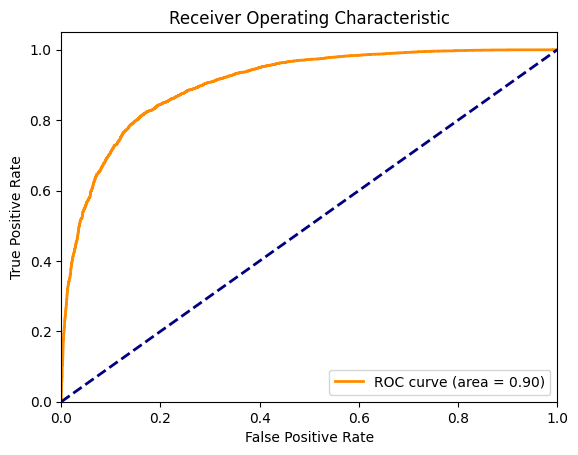

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = clf.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(clf, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_clf = clf.predict(X_test_vectorized)

print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_clf))
print(classification_report(y_test_encoded,y_pred_clf))

0.808975
[[3584 1466]
 [ 477 4473]]
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      5050
           1       0.75      0.90      0.82      4950

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.80     10000
weighted avg       0.82      0.81      0.80     10000



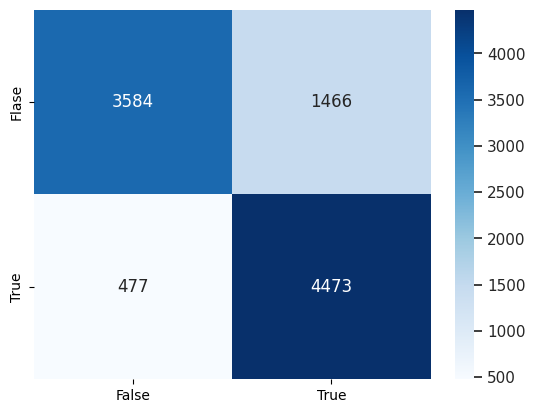

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded,y_pred_clf)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_clf)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_clf)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_clf)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_clf)))
cross_validation_score.append(scores.mean())


Random Forest 2

In [ ]:
#Train and fit your classifier
clf2 = RandomForestClassifier( n_estimators=800, max_leaf_nodes=12, random_state=35,max_depth=2)

clf2.fit(X_train_vectorized, y_train_encoded)

RandomForestClassifier(max_depth=2, max_leaf_nodes=12, n_estimators=800,
                       random_state=35)

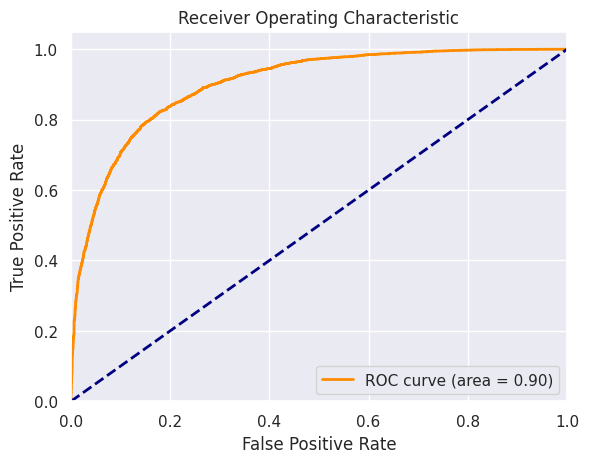

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = clf2.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(clf2, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_clf2 = clf2.predict(X_test_vectorized)

print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_clf2))
print(classification_report(y_test_encoded,y_pred_clf2))

0.8072250000000001
[[3586 1464]
 [ 489 4461]]
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      5050
           1       0.75      0.90      0.82      4950

    accuracy                           0.80     10000
   macro avg       0.82      0.81      0.80     10000
weighted avg       0.82      0.80      0.80     10000



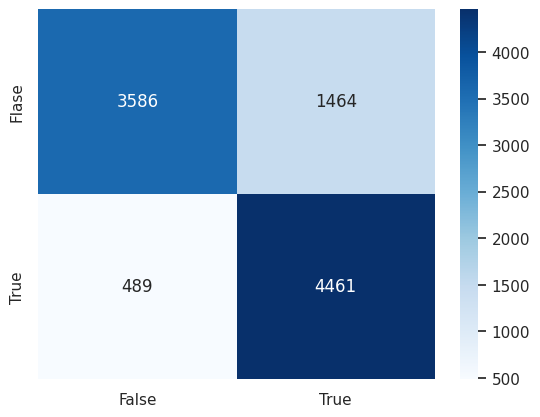

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded,y_pred_clf2)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_clf2)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_clf2)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_clf2)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_clf2)))
cross_validation_score.append(scores.mean())


Random Forest 3

In [ ]:
#Train and fit your classifier
clf3 = RandomForestClassifier( n_estimators=1500, max_leaf_nodes=18, random_state=35,max_depth=2)

clf3.fit(X_train_vectorized, y_train_encoded)

RandomForestClassifier(max_depth=2, max_leaf_nodes=18, n_estimators=1500,
                       random_state=35)

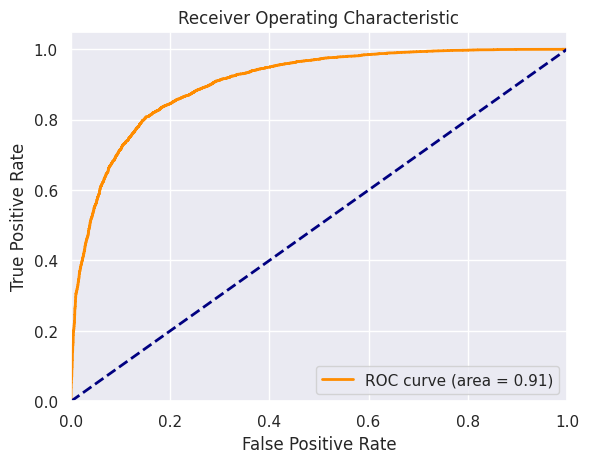

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = clf3.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(clf3, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_clf3 = clf3.predict(X_test_vectorized)

print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_clf3))
print(classification_report(y_test_encoded,y_pred_clf3))

0.8116999999999999
[[3601 1449]
 [ 472 4478]]
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      5050
           1       0.76      0.90      0.82      4950

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



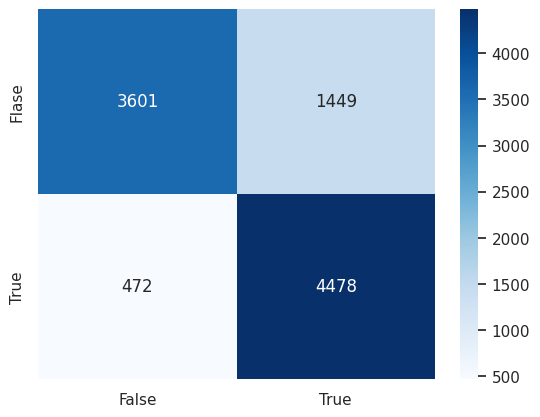

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded,y_pred_clf3)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_clf3)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_clf3)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_clf3)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_clf3)))
cross_validation_score.append(scores.mean())


Decision Tree 1

We ran three Decision Tree's.

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=35)

dt_clf2 = DecisionTreeClassifier(max_depth=10, random_state=35)

dt_clf3 = DecisionTreeClassifier(max_depth=15, random_state=35)

Each of these models contains diffrent values for max_depth. All of these models yielded differing results. On our final run dt_clf3 yielded the best results.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Train and fit your classifier
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=35)
dt_clf.fit(X_train_vectorized, y_train_encoded)

DecisionTreeClassifier(max_depth=5, random_state=35)

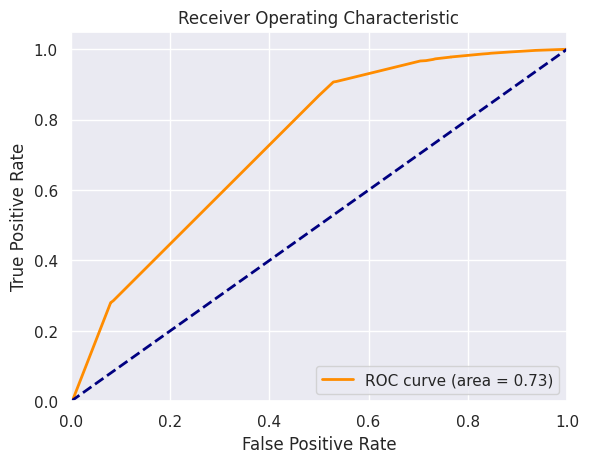

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = dt_clf.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(dt_clf, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_dt_clf = dt_clf.predict(X_test_vectorized)


In [ ]:
print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_dt_clf))
print(classification_report(y_test_encoded,y_pred_dt_clf))

0.693625
[[2379 2671]
 [ 461 4489]]
              precision    recall  f1-score   support

           0       0.84      0.47      0.60      5050
           1       0.63      0.91      0.74      4950

    accuracy                           0.69     10000
   macro avg       0.73      0.69      0.67     10000
weighted avg       0.73      0.69      0.67     10000



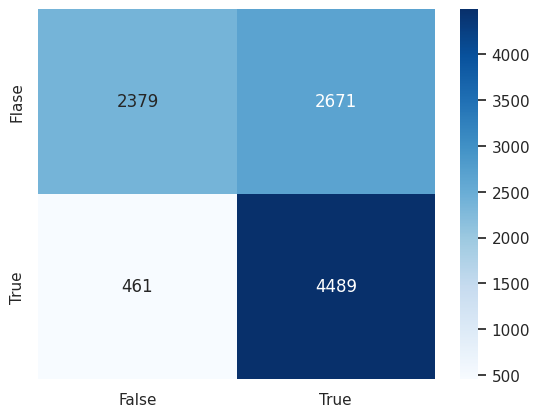

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_dt_clf)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_dt_clf)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_dt_clf)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_dt_clf)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_dt_clf)))
cross_validation_score.append(scores.mean())

Decision Tree 2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Train and fit your classifier
dt_clf2 = DecisionTreeClassifier(max_depth=10, random_state=35)
dt_clf2.fit(X_train_vectorized, y_train_encoded)

DecisionTreeClassifier(max_depth=10, random_state=35)

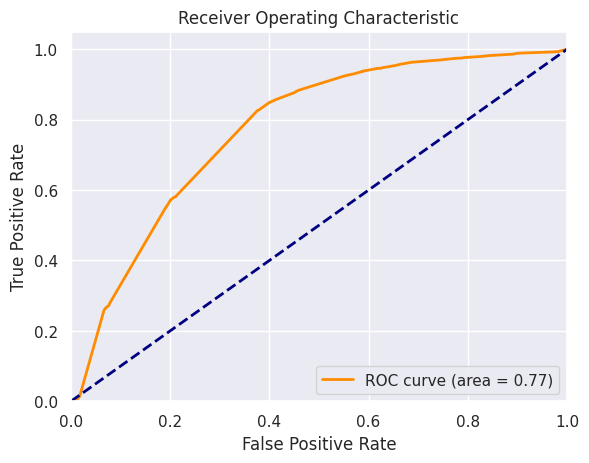

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = dt_clf2.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(dt_clf2, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_dt_clf2 = dt_clf2.predict(X_test_vectorized)


In [ ]:
print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_dt_clf2))
print(classification_report(y_test_encoded,y_pred_dt_clf2))

0.7306250000000001
[[3143 1907]
 [ 859 4091]]
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      5050
           1       0.68      0.83      0.75      4950

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



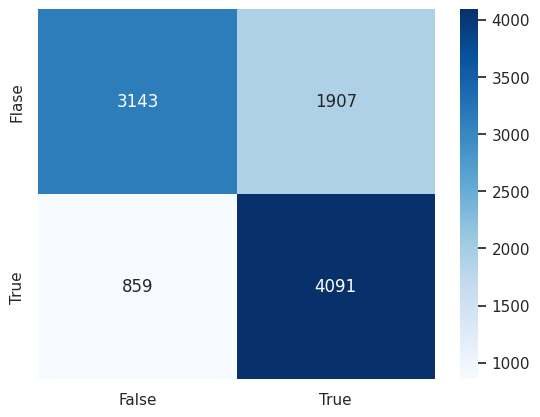

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_dt_clf2)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_dt_clf2)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_dt_clf2)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_dt_clf2)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_dt_clf2)))
cross_validation_score.append(scores.mean())

Decision Tree 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Train and fit your classifier
dt_clf3 = DecisionTreeClassifier(max_depth=15, random_state=35)
dt_clf3.fit(X_train_vectorized, y_train_encoded)

DecisionTreeClassifier(max_depth=15, random_state=35)

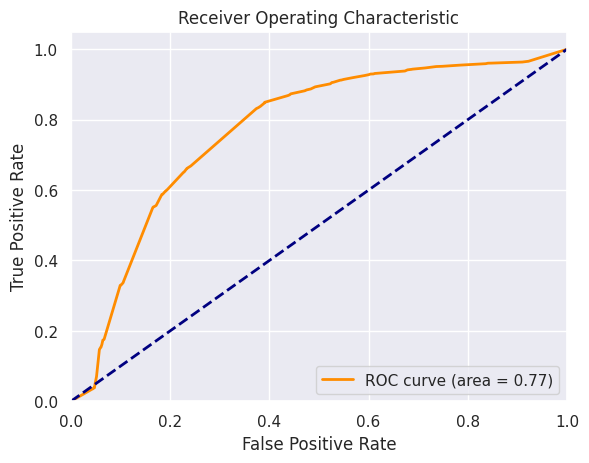

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = dt_clf3.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(dt_clf3, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_dt_clf3 = dt_clf3.predict(X_test_vectorized)


In [ ]:
print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_dt_clf3))
print(classification_report(y_test_encoded,y_pred_dt_clf3))

0.7341249999999999
[[3141 1909]
 [ 820 4130]]
              precision    recall  f1-score   support

           0       0.79      0.62      0.70      5050
           1       0.68      0.83      0.75      4950

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.72     10000
weighted avg       0.74      0.73      0.72     10000



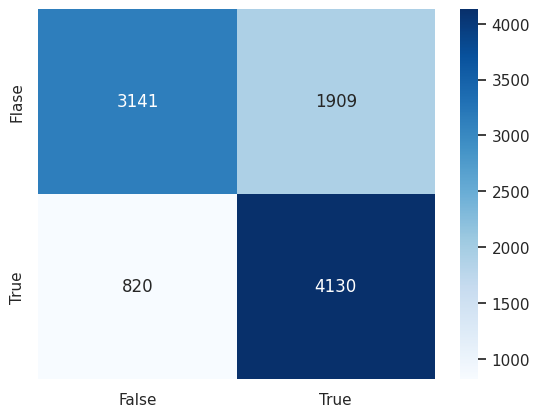

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_dt_clf3)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_dt_clf3)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_dt_clf3)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_dt_clf3)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_dt_clf3)))
cross_validation_score.append(scores.mean())

K-nearest Neighbor 1

We ran three K-nearest neighbor models.

knn = KNeighborsClassifier(n_neighbors = 5)

knn2 = KNeighborsClassifier(n_neighbors = 10)

knn3 = KNeighborsClassifier(n_neighbors = 15)

Each of these models contains diffrent values for n_neighbors. All of these models yielded differing results. On our final run Knn yielded the best results.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Train and fit your classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_vectorized, y_train_encoded)

KNeighborsClassifier()

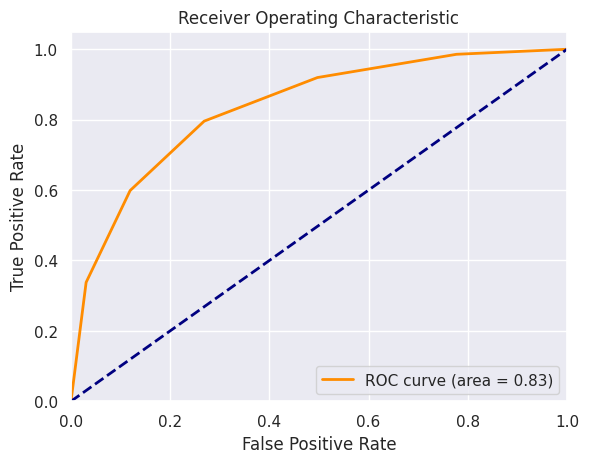

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = knn.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(knn, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_knn = knn.predict(X_test_vectorized)

In [ ]:
print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_knn))
print(classification_report(y_test_encoded,y_pred_knn))

0.76405
[[3694 1356]
 [1011 3939]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      5050
           1       0.74      0.80      0.77      4950

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



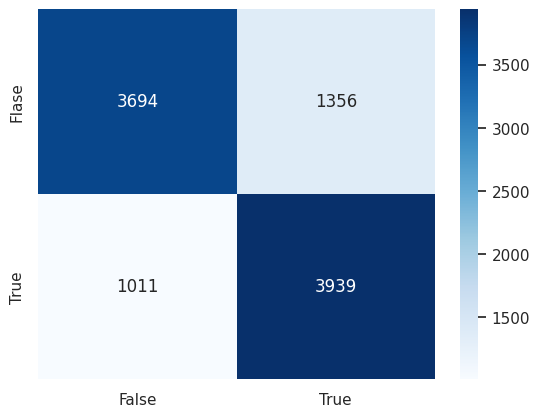

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_knn)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_knn)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_knn)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_knn)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_knn)))
cross_validation_score.append(scores.mean())

K-nearest Neighbor 2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Train and fit your classifier
knn2 = KNeighborsClassifier(n_neighbors = 10)
knn2.fit(X_train_vectorized, y_train_encoded)

KNeighborsClassifier(n_neighbors=10)

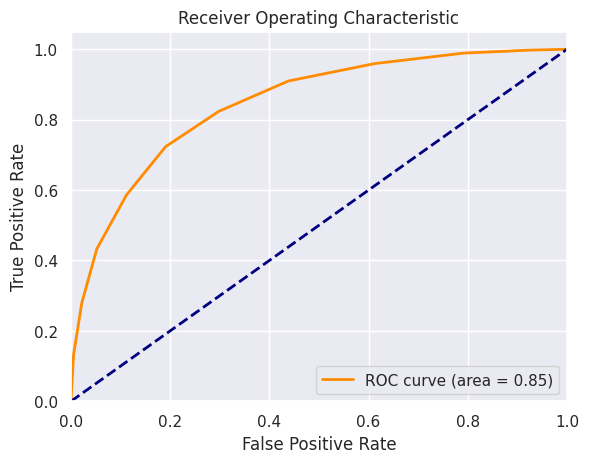

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = knn2.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(knn2, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_knn2 = knn2.predict(X_test_vectorized)

In [ ]:
print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_knn2))
print(classification_report(y_test_encoded,y_pred_knn2))

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_knn2)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_knn2)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_knn2)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_knn2)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_knn2)))
cross_validation_score.append(scores.mean())

K-nearest Neighbor 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Train and fit your classifier
knn3 = KNeighborsClassifier(n_neighbors = 15)
knn3.fit(X_train_vectorized, y_train_encoded)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = knn3.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(knn3, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_knn3 = knn3.predict(X_test_vectorized)

In [ ]:
print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_knn3))
print(classification_report(y_test_encoded,y_pred_knn3))

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_knn3)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_knn3)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_knn3)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_knn3)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_knn3)))
cross_validation_score.append(scores.mean())

XG Boost 1

We ran three XG Boosted models.

xgb = XGBClassifier(max_depth= 8, n_estimators= 150, random_state= 35,  learning_rate= 0.02, n_jobs=5)

xgb2 = XGBClassifier(max_depth= 5, n_estimators= 100, random_state= 35,  learning_rate= 0.03, n_jobs=5)

xgb3 = XGBClassifier(max_depth= 15, n_estimators= 200, random_state= 35,  learning_rate= 0.02, n_jobs=5)

These models contains diffrent values for max_depth, n_estimators, and learning_rate. All of these models yielded differing results. On our final run xgb3 yielded the best results.


In [ ]:
#Train and fit your classifier
xgb = XGBClassifier(max_depth= 8, n_estimators= 150, random_state= 35,  learning_rate= 0.02, n_jobs=5)

xgb.fit(X_train_vectorized, y_train_encoded)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = xgb.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(xgb, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_xgb = xgb.predict(X_test_vectorized)

print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_xgb))
print(classification_report(y_test_encoded,y_pred_xgb))

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_xgb)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_xgb)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_xgb)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_xgb)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_xgb)))
cross_validation_score.append(scores.mean())

XG Boost 2

In [ ]:
#Train and fit your classifier
xgb2 = XGBClassifier(max_depth= 5, n_estimators= 100, random_state= 35,  learning_rate= 0.03, n_jobs=5)

xgb2.fit(X_train_vectorized, y_train_encoded)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = xgb2.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(xgb2, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_xgb2 = xgb2.predict(X_test_vectorized)

print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_xgb2))
print(classification_report(y_test_encoded,y_pred_xgb2))

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_xgb2)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_xgb2)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_xgb2)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_xgb2)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_xgb2)))
cross_validation_score.append(scores.mean())

XG Boost 3

In [ ]:
#Train and fit your classifier
xgb3 = XGBClassifier(max_depth= 15, n_estimators= 200, random_state= 35,  learning_rate= 0.02, n_jobs=5)

xgb3.fit(X_train_vectorized, y_train_encoded)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = xgb3.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(xgb3, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_xgb3 = xgb3.predict(X_test_vectorized)

print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_xgb3))
print(classification_report(y_test_encoded,y_pred_xgb3))

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_xgb3)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_xgb3)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_xgb3)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_xgb3)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_xgb3)))
cross_validation_score.append(scores.mean())

## Model Selection

In [ ]:
#Show an overview of all model's performance
overview['Precision'] = precision
overview['Accuracy'] = accuracy
overview['Recall'] = recall
overview['F1_score'] = f1_scores
overview['Mean Cross Val Score'] = cross_validation_score

overview

In [ ]:
#Run our preferred model on the test set
y_pred = xgb3.predict(X_test_vectorized)
y_pred = pd.DataFrame(y_pred, columns=['sentiment'])
y_test_encoded = pd.DataFrame(y_test_encoded, columns=['sentiment'])



In [ ]:
#Create the bar plots for the model run on the test set
plt.subplot(1,2,1)
y_pred.fbs.value_counts().plot(kind='bar');
plt.title('xgb3 prediction on X_test')

plt.subplot(1,2,2)
y_test.fbs.value_counts().plot(kind='bar');
plt.title('y_test')
plt.show();

plt.show()

## Ensamble Modle

Our ensemble model was built using Stacking. We stacked our four best models for each model type we ran. The Stacking was done using the Sklearn StackingClassifier. Our final classifier is a logistic regression and uses the predicted values of these four models to inform its own predictions. By using the predicted values of our previous models as input to a new model the new model will optimally combine the model predictions to form a new set of predictions.

This ensemble model outperforms all of our other models for all metrics except Cross-Validation.


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

In [ ]:
#Stacking
Stacking = [('clf', clf),('clf2', clf2),('clf3', clf3),('dt_clf', dt_clf),('dt_clf2', dt_clf2),('dt_clf3', dt_clf3),('knn', knn),('knn2', knn2),('knn3', knn3),('xgb', xgb),('xgb2', xgb2),('xgb3', xgb3)]

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

#train the ensemble model
ensemble = StackingClassifier(estimators=Stacking, final_estimator=LogisticRegression())
ensemble.fit(X_train_vectorized, y_train_encoded)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a fitted classifier 'clf' and test data 'X_test', 'y_test'
y_pred_proba = ensemble.predict_proba(X_test_vectorized)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(ensemble, X_train_vectorized, y_train_encoded, cv=10, scoring='accuracy')
y_pred_ensemble = ensemble.predict(X_test_vectorized)

print(scores.mean())
print(confusion_matrix(y_test_encoded,y_pred_ensemble))
print(classification_report(y_test_encoded,y_pred_ensemble))

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_ensemble)
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test_encoded,y_pred_ensemble)))
accuracy.append(np.mean(metrics.accuracy_score(y_test_encoded,y_pred_ensemble)))
recall.append(np.mean(metrics.recall_score(y_test_encoded,y_pred_ensemble)))
f1_scores.append(np.mean(metrics.f1_score(y_test_encoded,y_pred_ensemble)))
cross_validation_score.append(scores.mean())

In [ ]:
#Show an overview of all model's performance including ensemble model
overview2['Precision'] = precision
overview2['Accuracy'] = accuracy
overview2['Recall'] = recall
overview2['F1_score'] = f1_scores
overview2['Mean Cross Val Score'] = cross_validation_score

overview2

Notes: Improvements for the future.
- Feature Selection
- K-fold Cross Validation
- Support Vector Machines
- Naive Bayes
- Logistic Regression
- PCA
- Hyper Parameter Tuning
- Create an ensemble model for all the classifiers and the convolutional neural network.